In [6]:
from dicom_csv import join_tree
path = "/data/umcutrecht/original_data/segmented_fibrosis_umc/Fibrosis/data/117016/Pancreas/12"
df = join_tree(path, relative=False, verbose=False)

In [9]:
df.columns

Index(['AccessionNumber', 'AcquisitionDate', 'AcquisitionDateTime',
       'AcquisitionTime', 'BitsAllocated', 'BitsStored', 'CTDIvol', 'Columns',
       'ContrastBolusAgent', 'ContrastBolusRoute', 'ConvolutionKernel',
       'DataCollectionDiameter', 'EstimatedDoseSaving', 'Exposure',
       'ExposureModulationType', 'ExposureTime', 'FilterType',
       'FrameOfReferenceUID', 'GantryDetectorTilt', 'HighBit',
       'ImageOrientationPatient0', 'ImageOrientationPatient1',
       'ImageOrientationPatient2', 'ImageOrientationPatient3',
       'ImageOrientationPatient4', 'ImageOrientationPatient5',
       'ImagePositionPatient0', 'ImagePositionPatient1',
       'ImagePositionPatient2', 'InstanceCreationDate', 'InstanceCreationTime',
       'InstanceNumber', 'KVP', 'Laterality', 'Manufacturer',
       'ManufacturerModelName', 'Modality', 'PatientBirthDate', 'PatientID',
       'PatientName', 'PatientPosition', 'PatientSex',
       'PerformingPhysicianName', 'PhotometricInterpretation',
    

### contour

In [1]:
import dicom_csv	
dicom_csv.spatial.get_slices_plane(df)

ModuleNotFoundError: No module named 'dicom_csv'

In [2]:
from dicom_csv.rtstructs.csv import collect_rtstructs

df_rtstructs = dicom_csv.collect_rtstructs(df)

ModuleNotFoundError: No module named 'dicom_csv'

In [60]:
path = "/data/umcutrecht/original_data/segmented_fibrosis_umc/Fibrosis/data/117008/Pancreas/"
# df = join_tree(path, relative=False, verbose=False)

In [61]:
from rt_utils import RTStructBuilder
import matplotlib.pyplot as plt
ct_path = path + "8/"
rtstruct_path = path + "voi.dcm"
# Load existing RT Struct. Requires the series path and existing RT Struct path
rtstruct = RTStructBuilder.create_from(
  dicom_series_path= ct_path, 
  rt_struct_path=rtstruct_path 
)

# View all of the ROI names from within the image
print(rtstruct.get_roi_names())

# Loading the 3D Mask from within the RT Struct
mask_3d = rtstruct.get_roi_mask_by_name("GTV")

['GTV']


In [62]:
mask_3d.max(axis=(0,1)).argmax()

np.int64(159)

159 (512, 512, 207)


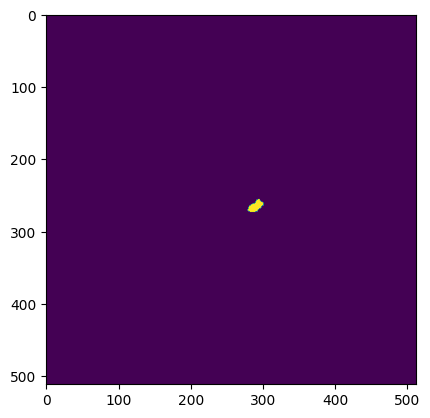

In [63]:
big_slice_index = mask_3d.max(axis=(0,1)).argmax()
first_mask_slice = mask_3d[:, :, big_slice_index]
print(big_slice_index, mask_3d.shape)
plt.imshow(first_mask_slice)
plt.show()

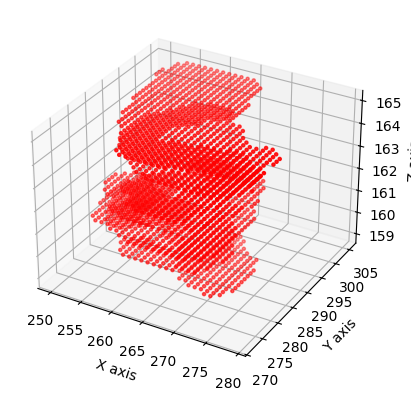

In [75]:
# visualize the mask in 3d space
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.where(mask_3d == 1)
ax.scatter(x, y, z, c='r', marker='.')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


In [65]:
from platipy.dicom.io.rtstruct_to_nifti import convert_rtstruct
img_out = 'ct_image' # The name of the output image
rts_path = rtstruct_path # The path to the RTStruct file
output_path= "/home/ranx/Projects/dicom-contour-to-nifti-mask/dicom_contour_to_nifti_mask"
# A list containing the desired image spacing (x,y,z).
# A value of 0 indicates that the spacing should not be 
# changed in that dimension.
px_space = [0,0,0]

# Pass these additional settings to the function as keyword arguments
prefix = "Tumor_"
convert_rtstruct(
    ct_path,
    rts_path,
    prefix=prefix,
    output_dir=output_path,
    output_img=img_out,
    spacing=px_space
)

In [66]:
import nibabel as nib

annotation = nib.load(output_path + "/" + prefix + "GTV" + ".nii.gz")
ct = nib.load(output_path + "/" + "ct_image" + ".nii.gz")

42 (512, 512, 207)


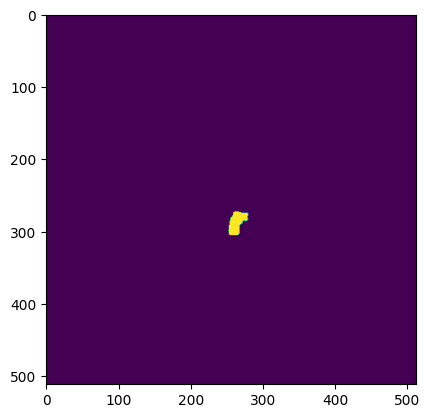

In [ ]:
annotation_data = annotation.get_fdata()

big_slice_index = annotation_data.max(axis=(0,1)).argmax()
# big_slice_index = 232 - big_slice_index
print(big_slice_index,annotation.shape)
plt.imshow(annotation_data[:,:,big_slice_index])


In [68]:
annotation_data.max(axis=(0,1)).argmax()

np.int64(42)

42 (512, 512, 207)


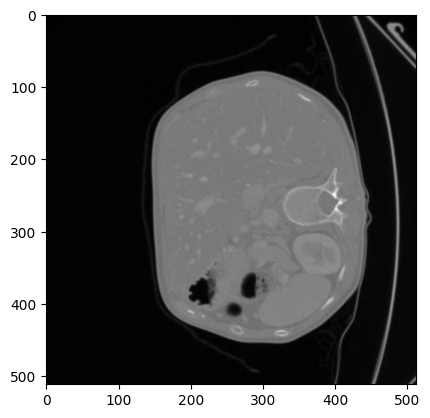

In [ ]:
ct_data = ct.get_fdata()

print(big_slice_index,annotation.shape)
plt.imshow(ct_data[:,:,big_slice_index])
plt.imshow(ct_data[:,:,ct_data.shape[-1] - big_slice_index], cmap='gray')

<OrthoSlicer3D: /home/ranx/Projects/dicom-contour-to-nifti-mask/dicom_contour_to_nifti_mask/ct_image.nii.gz (512, 512, 207)>

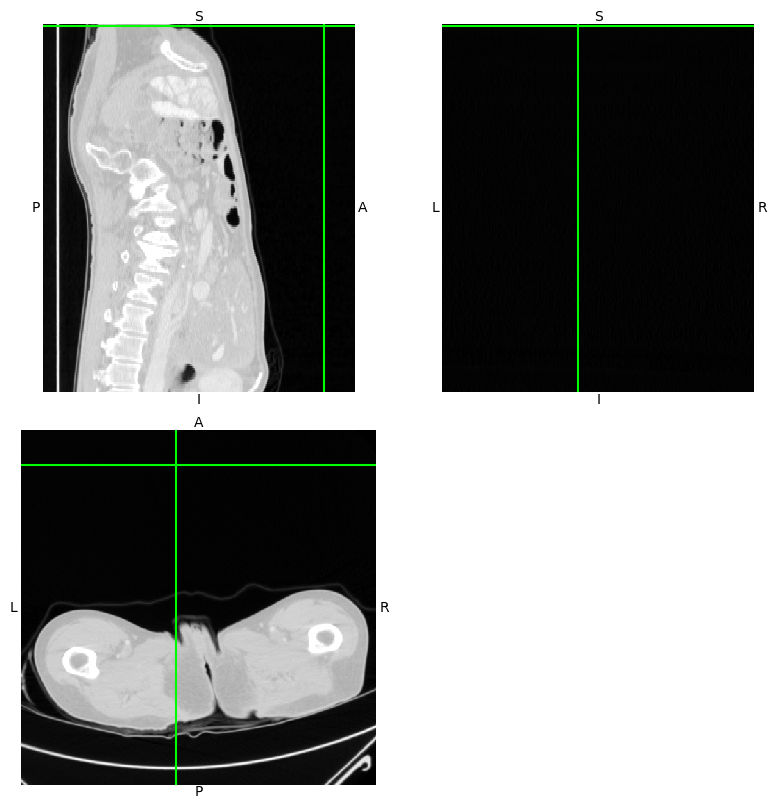

In [79]:
ct.orthoview()

(512, 512, 207)


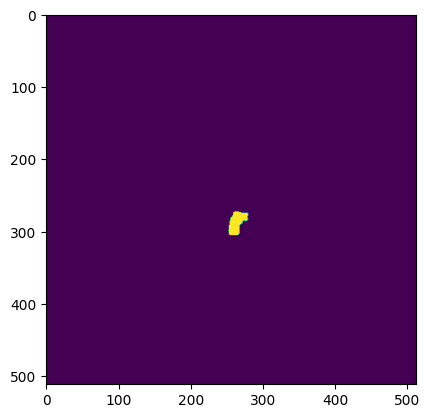

In [83]:
current_mask_path = "/data/umcutrecht/original_data/segmented_fibrosis_umc/Fibrosis/nifti_correct_files/Mask/label117008GTV.nii.gz"
current_mask = nib.load(current_mask_path)
current_mask_data = current_mask.get_fdata()
print(current_mask_data.shape)
plt.imshow(current_mask_data[:,:,big_slice_index])
plt.imshow(current_mask_data[:,:,current_mask_data.shape[-1] - big_slice_index])

In [72]:
current_mask_data.max(axis=(0,1)).argmax()

np.int64(159)

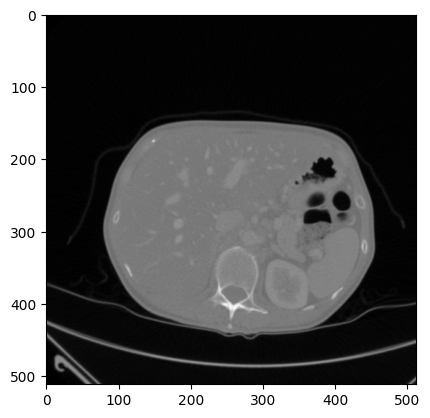

In [87]:
# read the dicom attributes
import pydicom
ds = pydicom.dcmread(ct_path + "ct_1.2.840.113704.1.111.5652.1469625096.46954.dcm")
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

# findings 
no cropping with this method and of high quality. 
images are getting rotated